In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**replacing blanks with zero as tenure is zero and no total charges are recorded**

In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0").astype("float")

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df['customerID'].duplicated().sum()

np.int64(0)

**Convert 0 and 1 values of senior citizen to yes/no to make it easier to understand**

In [9]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

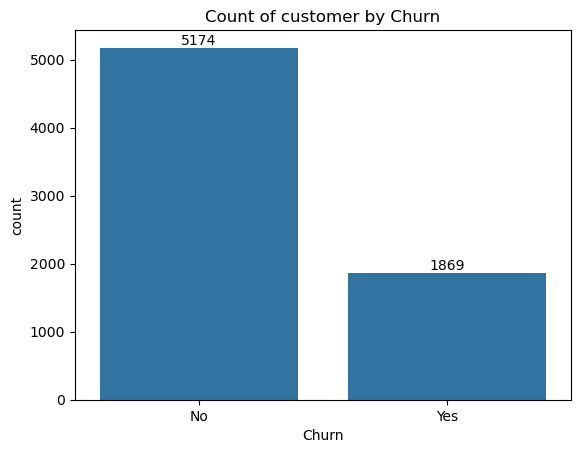

In [10]:
ax=sns.countplot(x = 'Churn',data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Churn")
plt.show()

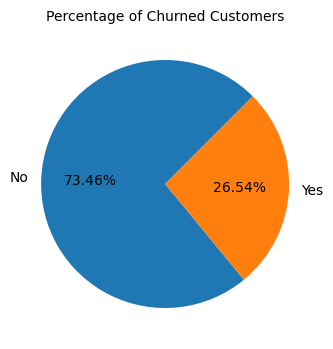

In [11]:
plt.figure(figsize=(4,5))
gb = df.groupby("Churn").agg({'Churn':"count"})
gb
plt.pie(gb['Churn'],labels = gb.index,
       startangle=45,
       autopct='%1.2f%%',
       radius=1)
plt.title("Percentage of Churned Customers",fontsize = 10)
plt.show()

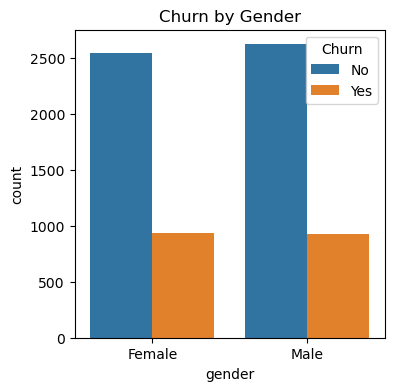

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x = "gender", data = df, hue= 'Churn')
plt.title("Churn by Gender")
plt.show()

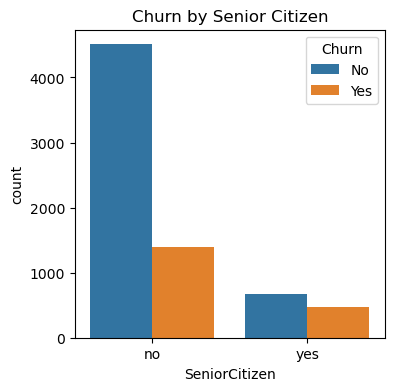

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x = "SeniorCitizen", data = df, hue= "Churn")
plt.title('Churn by Senior Citizen')
plt.show()

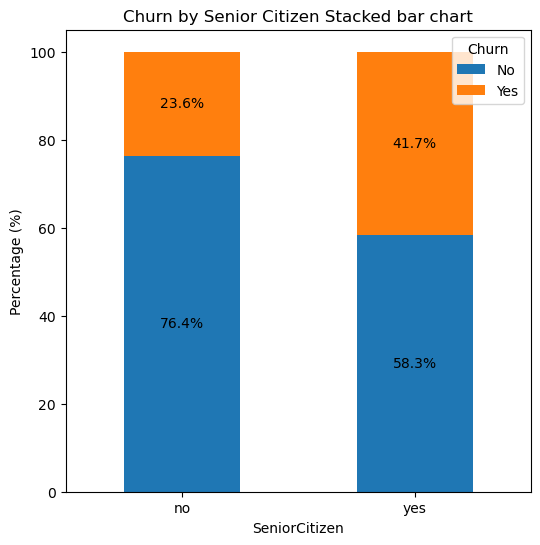

In [14]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100

fig, ax = plt.subplots(figsize=(6,6))

total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4','#ff7f0e'])

for p in ax.patches:
    width,height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha= 'center', va='center')

plt.title('Churn by Senior Citizen Stacked bar chart')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

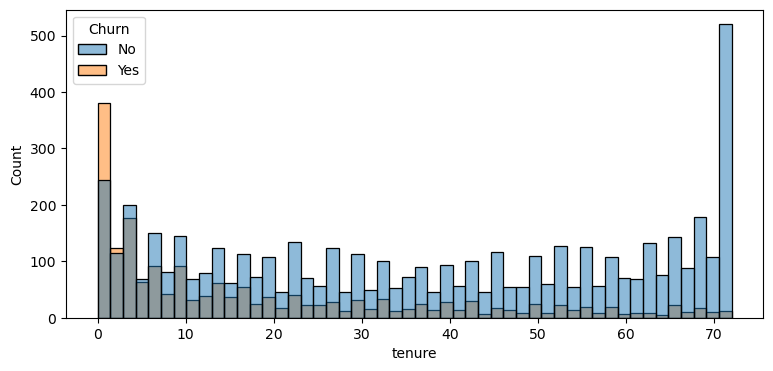

In [15]:
plt.figure(figsize=(9,4))
sns.histplot(x = 'tenure', data = df, bins = 50, hue= 'Churn')
plt.show()

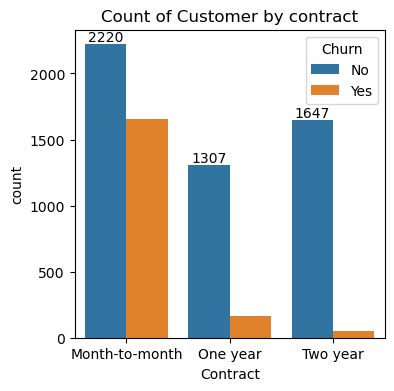

In [16]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'Contract', data = df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of Customer by contract')
plt.show()

In [17]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

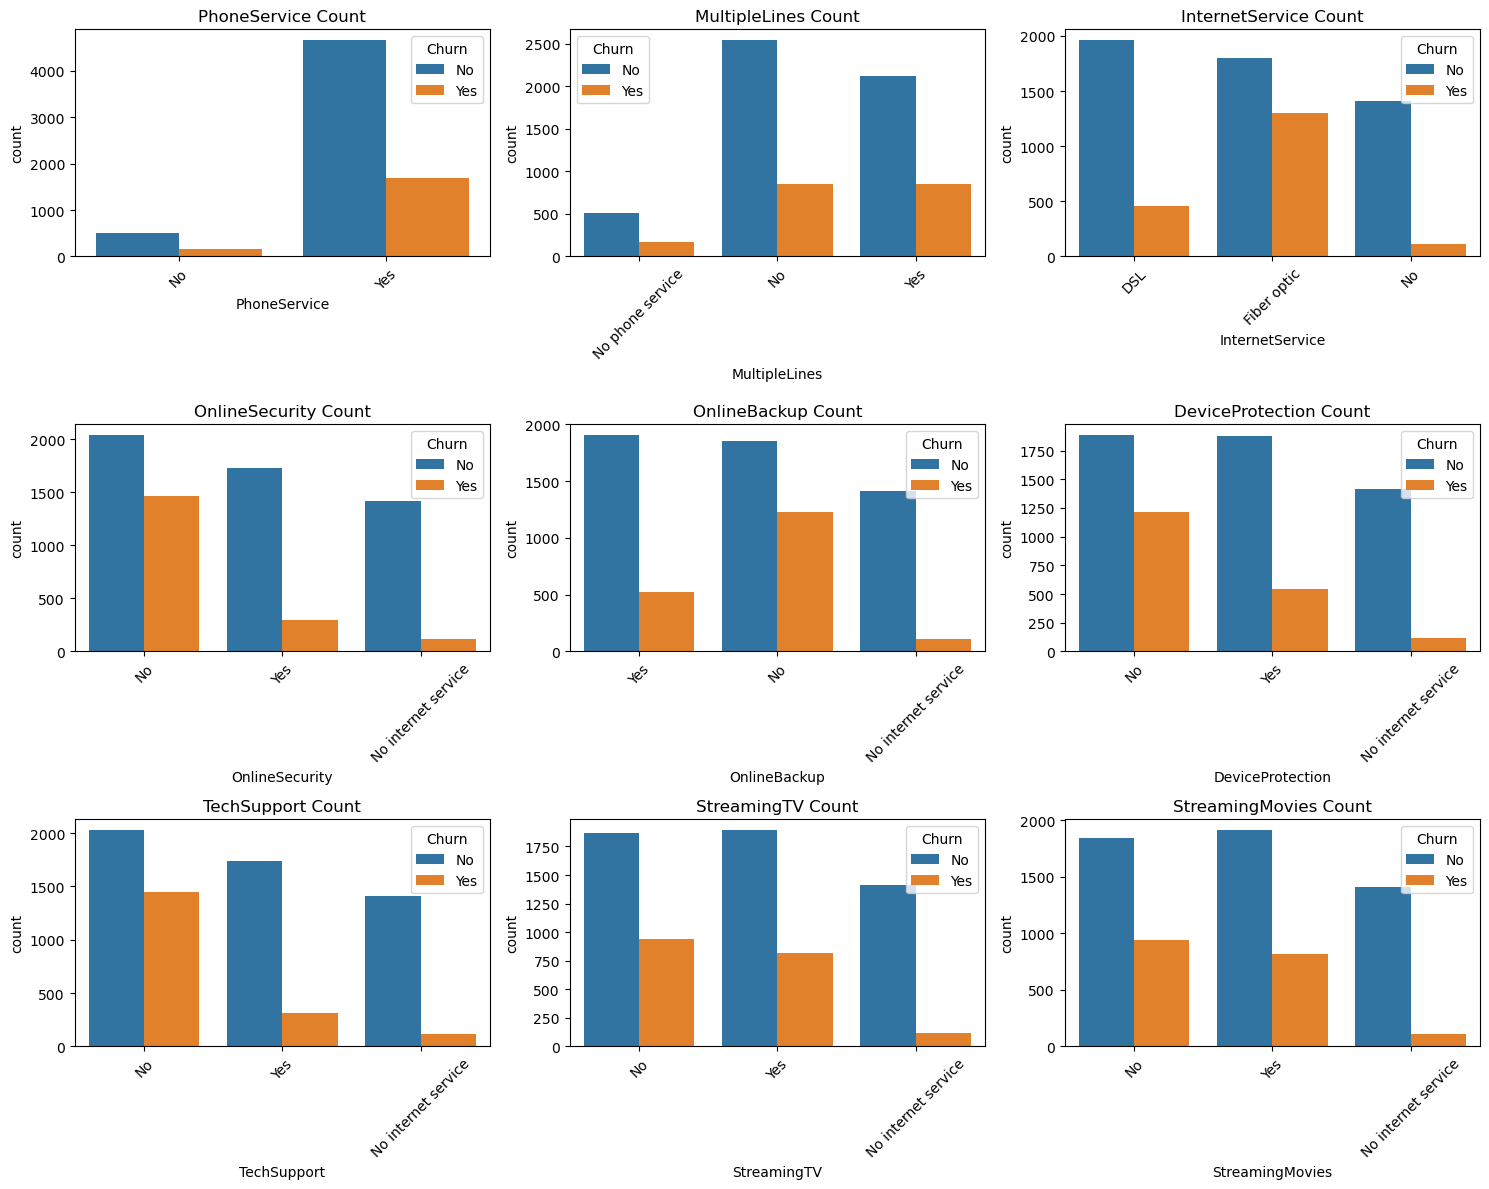

In [18]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(3, 3, figsize=(15,12))  # 3x3 grid
axes = axes.flatten()  # 2D array to 1D for looping

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i],hue= df['Churn'])
    axes[i].set_title(f'{col} Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


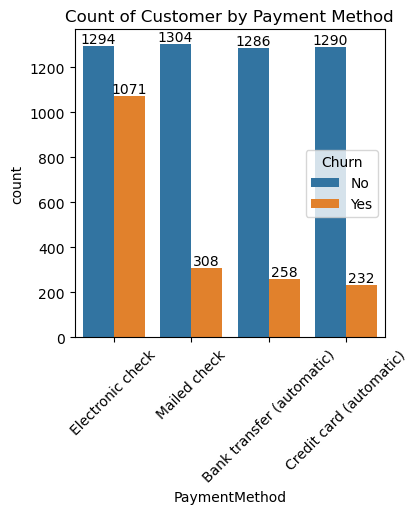

In [19]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'PaymentMethod', data = df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Customer by Payment Method')
plt.xticks(rotation = 45)
plt.show()